## Homework #10:  Surf's UP!

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.

### Step 1: Initialize and retrieve all necessary programming, SQL, and plotting tools.  Connect to database.

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

 * Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.
 * Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
 * Use SQLAlchemy create_engine to connect to your sqlite database.
 * Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes
   called Station and Measurement.

In [1]:
# Import the basic Matplotlib dependencies in preparation for generating data plots

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import the numerical analysis and pandas libraries for use in jupyter

import numpy as np
import pandas as pd

In [3]:
# Import the datetime methods that allow for manipulation of data-time stamps

import datetime as dt

In [4]:
# Import Python SQL toolkit and Object Relational Mapper (SQLAlchemy)
# SQLAlchemy is the Python SQL toolkit and Object Relational Mapper that gives application developers 
# the full power and flexibility of SQL.

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Column, Integer, String, Float

###  Create an "engine" that can talk to the database

The Engine is the starting point for any SQLAlchemy application. It's “home base” for the actual database and its DBAPI, delivered to the SQLAlchemy application through a connection pool and a Dialect, which describes how to talk to a specific kind of database/DBAPI combination.


In [5]:
# https://docs.sqlalchemy.org/en/13/core/engines.html provides syntax for SQLAlchemy methods

database_path = "./Resources/hawaii.sqlite"

engine = create_engine(f"sqlite:///{database_path}")

In [6]:
# Reflect an existing database into a new model.  Allows for us to build on previous database classes.

Base = automap_base()

# Reflect the tables that already exist

Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

### Inspect the tables in a few different ways to understand what data are there and how they are constructed.

In [10]:
# Look at Measurement class
obs = session.query(Measurement)
print(obs)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


In [11]:
# Look at Measurement class
obs = session.query(Station)
print(obs)

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station


In [12]:
# Using the inspect method to print the column names within the 'Measurement' table and its types
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Look at the first few records of the Measurement table
alldata = engine.execute('SELECT * FROM Measurement').fetchall()
print(alldata[0:5])

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0)]


In [15]:
# Look at the first few records of the Station table
alldata = engine.execute('SELECT * FROM Station').fetchall()
print(alldata[0:5])

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]


In [16]:
# Determine the dates of the database entries for all of the records.  Date format from above is: YYYY-MM-DD.

firstdate = session.query(Measurement.date).order_by(Measurement.date).first()
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The data set runs from {firstdate} to {lastdate}")

The data set runs from ('2010-01-01',) to ('2017-08-23',)


### We have two related tables of information from January 1, 2010 to August 23, 2017:
* Measurement: primary key id, station, date, precipitation and temperature
* Station: primary key id, station, station name, latitude, longitude, and elevation

### Exploratory Climate Analysis: Annual Precipitation amounts

In [17]:
# Design a query to retrieve the last 12 months of precipitation data (Aug 23, 2016 to Aug 23, 2017)
# and plot the results
precip = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

In [33]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns = ["date","precipitation"])
# Delete the index counter column by setting new index
precip_df.set_index('date', inplace = True)
precip_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [34]:
# Sort the dataframe by date
precip_df = precip_df.sort_values(by ='date')
precip_df.tail()

,precipitation
date,
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45


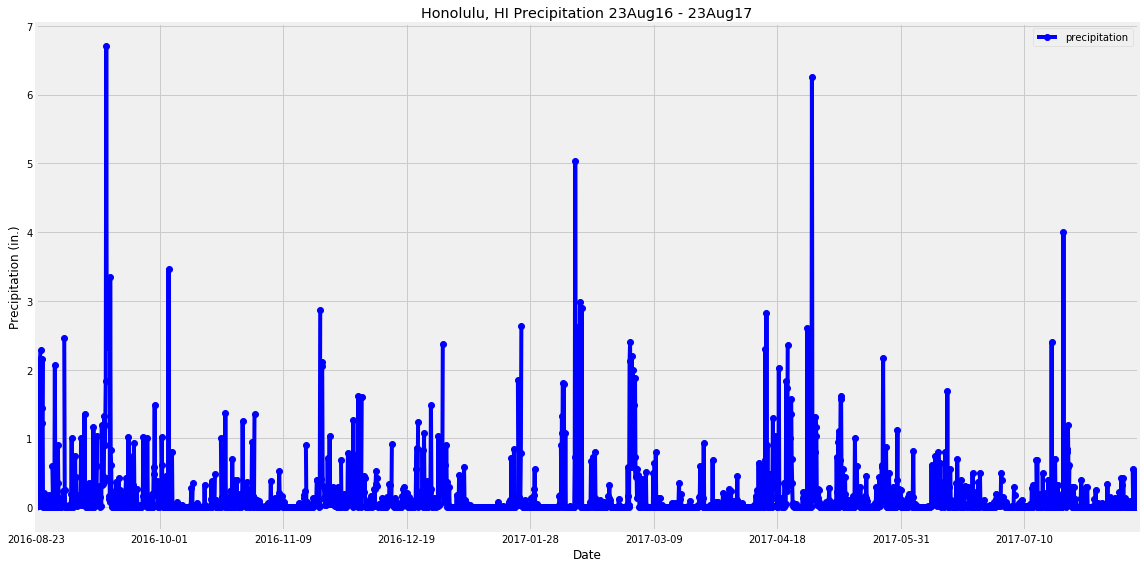

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize = (16, 8))
precip_df.plot(ax = ax, x_compat = True, color='blue', marker='o')

#set title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in.)')
ax.set_title("Honolulu, HI Precipitation 23Aug16 - 23Aug17")

#save figure
plt.savefig("./Images/precip_mcc.png")

#plot figure
plt.tight_layout()
plt.show()

In [36]:
# Use Pandas describe function to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


> The mean annual rain rate of 0.17 in this specific year in Honolulu is quite low, although there were several days in
> September, February, April, and July with days that had of much higher rain rates.  The maximum rain rate was 6.7 inches 
> in September.
> From this plot, it appears that the **best time to vacation in Honolulu** would be 
> in the drier months of **October, December, March and May**

### Exploratory Climate Analysis: Annual Temperature

In [42]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station.id).distinct().count()
print(f"The total number of unique stations is {num_stations}")

The total number of unique stations is 9


In [59]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = session.query(Station.station, func.count(Measurement.id)).select_from(Measurement).\
    join(Station, Measurement.station == Station.station).group_by(Station.station).\
    order_by(func.count(Measurement.id).desc()).all()
station_counts[0][0]

for result in station_counts:
    print(f"Station: {result[0]}\tCount: {result[1]}")
    
mostactive = station_counts[0][0]
print(f"Most active station is {mostactive}")

Station: USC00519281	Count: 2772
Station: USC00519397	Count: 2724
Station: USC00513117	Count: 2709
Station: USC00519523	Count: 2669
Station: USC00516128	Count: 2612
Station: USC00514830	Count: 2202
Station: USC00511918	Count: 1979
Station: USC00517948	Count: 1372
Station: USC00518838	Count: 511
Most active station is USC00519281


In [61]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
summary_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == mostactive).all()
print(f"Lowest Temperature: {summary_temps[0][0]} Fahrenheit")
print(f"Highest Temperature: {summary_temps[0][1]} Fahrenheit")
print(f"Average Temperature: {round(summary_temps[0][2], 2)} Fahrenheit")

Lowest Temperature: 54.0 Fahrenheit
Highest Temperature: 85.0 Fahrenheit
Average Temperature: 71.66 Fahrenheit


In [65]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearly_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == mostactive).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

#save as a data frame
yearly_temps_df = pd.DataFrame(yearly_temps, columns = ['date', 'temperature'])

#index by date
yearly_temps_df.set_index('date', inplace = True)
yearly_temps_df.head()


,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


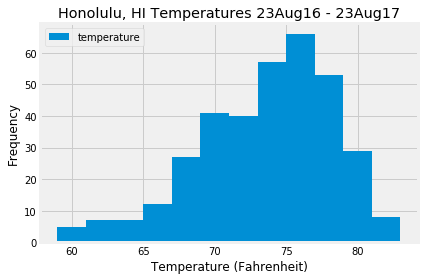

In [66]:
#plot histogram
fig, ax = plt.subplots()
yearly_temps_df.plot.hist(bins = 12, ax = ax)

#set labels
ax.set_xlabel('Temperature (Fahrenheit)')
ax.set_ylabel('Frequency')
ax.set_title("Honolulu, HI Temperatures 23Aug16 - 23Aug17")

#save figure
plt.savefig("Images/annualtemphisto.png")

#plot
plt.tight_layout()
plt.show()

> Honolulu has pleasant temperatures year-round, with the peak frequency around 76 deg F.

In [67]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [73]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start = '2017-03-09'
end = '2017-03-19'
my_vacay = calc_temps(start,end)
print(f"Daily low temperature is {my_vacay[0][0]} Farenheit")
print(f"Daily average temperature is {round(my_vacay[0][1],2)} Farenheit")
print(f"Daily high temperature is {my_vacay[0][2]} Farenheit")

Daily low temperature is 65.0 Farenheit
Daily average temperature is 71.4 Farenheit
Daily high temperature is 82.0 Farenheit


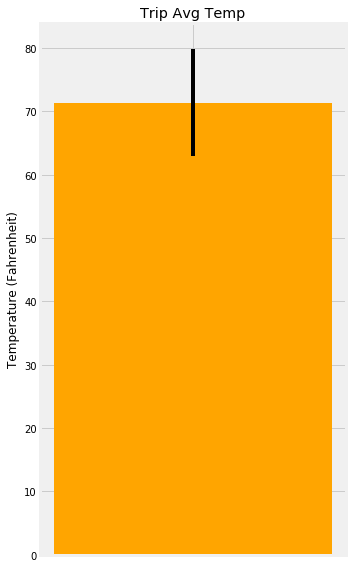

In [76]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
pktopk = my_vacay[0][2] - my_vacay[0][0]
avg_temp = my_vacay[0][1]

#plot figure
fig, ax = plt.subplots(figsize = (5, 8))

ax.bar(1, avg_temp, yerr = pktopk/2, width = 0.4, color='orange')

#set labels
ax.set_xticks([1])
ax.set_xticklabels([""])
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temperature (Fahrenheit)')

#save fig
plt.savefig("Images/tempbar")

#show figure
plt.tight_layout()
plt.show()

In [102]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
yearly_rainfall = session.query(Station.station, Station.name, Station.latitude, Station.longitude,
                               Station.elevation, func.avg(Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 3, 9)).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) <= dt.date(2016, 3, 19)).\
    group_by(Station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

#load into a dataframe
           
yearly_rainfall_df = pd.DataFrame(yearly_rainfall, columns = ['Station', 'Name', 'Latitude', 'Longitude', 
                                                              'Elevation', 'Avg. Precipitation (in.)'])

yearly_rainfall_df

,Station,Name,Latitude,Longitude,Elevation,Avg. Precipitation (in.)
0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.170000
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.167273
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.157273
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.090000
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.050000
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.029091
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.000000


In [111]:
avgprecip = round( yearly_rainfall_df["Avg. Precipitation (in.)"].mean(), 2)
print(f"Average at all stations for the vacation period is  {avgprecip} inches")

Average at all stations for the vacation period is  0.09 inches


## Optional Challenge Assignment

In [113]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("03-09")

[(57.0, 68.56140350877193, 75.0)]

In [148]:
month = 3
day = 9
monthday = dt.date(2017,month,day).strftime("%m-%d")
monthday
daily_normals(monthday)

[(57.0, 68.56140350877193, 75.0)]

In [179]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
daily_norms = []

# Use the start and end date to create a range of dates
query_date = dt.date(2017,3, 19) - dt.date(2017,3,9)
print("Query Date: ", query_date)

dates = []
# Stip off the year and save a list of %m-%d strings
# for i in query_date:
month = 3
day = 9
stay = 11

for i in range(stay):
    dlist = {}
    monthday = dt.date(2017,month,day).strftime("%m-%d")
    dlist["date"] = f"2019-{monthday}"
    daily_norm = daily_normals(monthday)
    dlist["min"]= daily_norm[0][0]
    dlist["avg"]= daily_norm[0][1]
    dlist["max"]= daily_norm[0][2]
    daily_norms.append(dlist)
    day +=1
    
daily_norms

Query Date:  10 days, 0:00:00


[{'date': '2019-03-09', 'min': 57.0, 'avg': 68.56140350877193, 'max': 75.0},
 {'date': '2019-03-10', 'min': 57.0, 'avg': 69.12280701754386, 'max': 75.0},
 {'date': '2019-03-11', 'min': 60.0, 'avg': 69.89285714285714, 'max': 82.0},
 {'date': '2019-03-12', 'min': 62.0, 'avg': 69.88888888888889, 'max': 80.0},
 {'date': '2019-03-13', 'min': 56.0, 'avg': 69.29629629629629, 'max': 77.0},
 {'date': '2019-03-14', 'min': 62.0, 'avg': 70.32758620689656, 'max': 77.0},
 {'date': '2019-03-15', 'min': 58.0, 'avg': 68.54716981132076, 'max': 76.0},
 {'date': '2019-03-16', 'min': 60.0, 'avg': 69.70370370370371, 'max': 78.0},
 {'date': '2019-03-17', 'min': 57.0, 'avg': 68.54, 'max': 75.0},
 {'date': '2019-03-18', 'min': 57.0, 'avg': 67.7843137254902, 'max': 76.0},
 {'date': '2019-03-19', 'min': 60.0, 'avg': 69.1, 'max': 75.0}]

In [180]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_norms_df = pd.DataFrame(daily_norms)
daily_norms_df.set_index('date', inplace=True)
daily_norms_df

,avg,max,min
date,,,
2019-03-09,68.561404,75.0,57.0
2019-03-10,69.122807,75.0,57.0
2019-03-11,69.892857,82.0,60.0
2019-03-12,69.888889,80.0,62.0
2019-03-13,69.296296,77.0,56.0
2019-03-14,70.327586,77.0,62.0
2019-03-15,68.547170,76.0,58.0
2019-03-16,69.703704,78.0,60.0
2019-03-17,68.540000,75.0,57.0


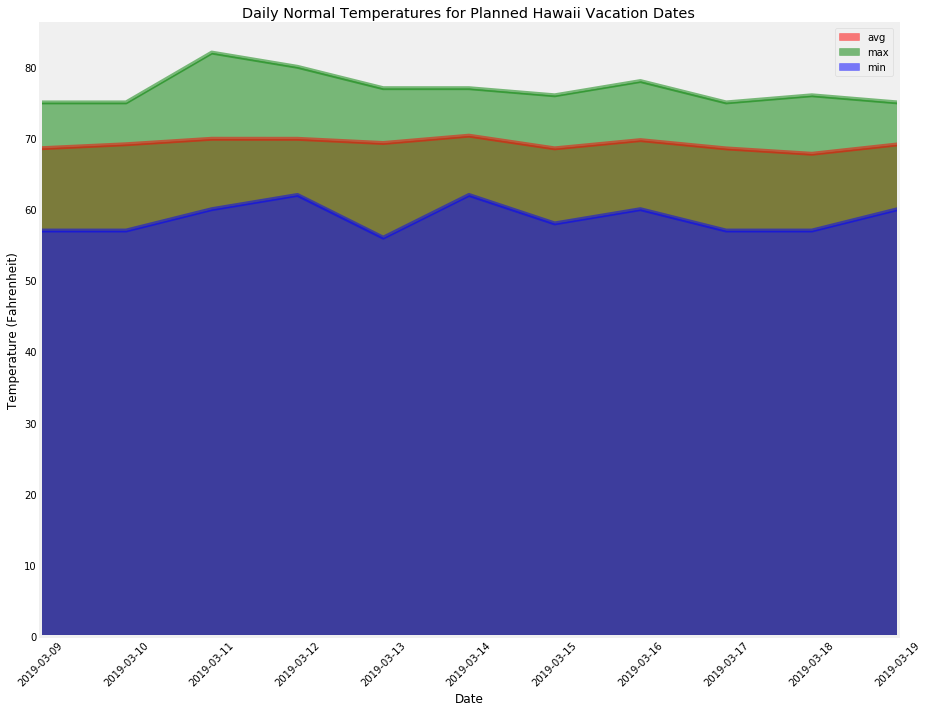

In [184]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize = (13, 10))
daily_norms_df.plot.area(ax = ax, stacked = False, color=['r','g','b','y'])

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (Fahrenheit)')
ax.set_title('Daily Normal Temperatures for Planned Hawaii Vacation Dates')

#set ticks
# # dates = [f"2019-{trip_date}" for trip_date in trip_dates]
xdates = daily_norms_df.index
ax.set_xticks(np.arange(len(xdates)))
ax.set_xticklabels(xdates, rotation = 45)

#save figure
plt.savefig('Images/dailynormarea.png')

#show
plt.grid()
plt.tight_layout()
plt.show()

### Looks like a nice time for a Hawaiian vacation!  Aloha!